# Принятие решений в бизнесе

# Введение

**Цели работы:** 
* Приоритизация 9 гипотез с помощью фреймворков ICE и RICE;
* Проведение A/B-теста на основании данных по двум группам пользователей, посещавших сайт и совершавших покупки;
* Формулировка гипотез на основании данных и их проверка;
* Проведение анализа результатов и подведение итогов проведенного теста.

**Основной целью проекта является решение бизнес-задачи, которая заключается в определении различий между двумя наблюдаемыми группами по среднему количеству заказов на пользователя, а также среднему чеку. Данная задача будет решена с помощью проведения A/B-теста.**

A/B-тест будет проводиться на основании построения различных графиков и расчетов:
* график кумулятивной выручки по группам и кумулятивного среднего чека по группам;
* график относительного изменения кумулятивного среднего чека и кумулятивного среднего количества заказов на посетителя группы B к группе A;
* график кумулятивного среднего количества заказов на посетителя по группам;
* точечный график количества заказов по пользователям;
* расчет 95-го и 99-го перцентилей количества заказов на пользователя и стоимости заказов. Определена границы аномальных значений;
* точечный график стоимостей заказов;
* расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» и «очищенным» данным;
* статистической значимости различий в среднем чеке заказа между группами по «сырым» и «очищенным» данным;

На основании проделанной работы будет принято решение об остановке теста и выявлении, либо не выявлении группы-победителя, или необходимости продолжить тест.

**Описание данных**

1. *Данные о гипотезах.* 

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

2. *Данные о заказах.*

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

3. *Данные о визитах.*

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Проект будет выполнен по плану, представленному ниже.

# План работы

1. [**Загрузка данных.**](#1-bullet)
2. [**Подготовка данных.**](#2-bullet)
3. [**Исследовательский анализ данных.**](#3-bullet)
4. [**Приоритизация гипотез.**](4#-bullet)
5. [**Анализ A/B-теста.**](5#-bullet)
6. [**Общий вывод.**](#6-bullet)

In [1]:
import pandas as pd

import datetime as dt

import numpy as np

import matplotlib.pyplot as plt

import warnings

import numpy as np

import plotly as pl

import seaborn as sns

import scipy.stats as stats

In [2]:
pd.set_option('display.max_colwidth', None) 

<a class='anchor' id='1-bullet'></a>
## 1. Загрузка данных

**Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы**

In [3]:
# считаем данные о гипотезах и поместим в переменную 'hyp_data'
try:
    hyp_data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
except:
    hyp_data = pd.read_csv(r"C:\Users\Александр\Desktop\Аналитика данных\ПРОЕКТЫ\Принятие решений в бизнесе\hypothesis.csv", sep=',')

In [4]:
# считаем данные о заказах и поместим в переменную 'ord_data'
try:
    ord_data = pd.read_csv('/datasets/orders.csv', sep=',')
except:
    ord_data = pd.read_csv(r"C:\Users\Александр\Desktop\Аналитика данных\ПРОЕКТЫ\Принятие решений в бизнесе\orders (1).csv", sep=',')

In [5]:
# считаем данные о визитах и поместим в переменную 'vis_data'
try:
    vis_data = pd.read_csv('/datasets/visitors.csv', sep=',')
except:
    vis_data = pd.read_csv(r"C:\Users\Александр\Desktop\Аналитика данных\ПРОЕКТЫ\Принятие решений в бизнесе\visitors.csv", sep=',')

**Выведем первые строки данных и изучим общую информацию**

In [6]:
# выведем все строки датафрейма hyp_data
hyp_data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [7]:
# выведем общую информацию о датафрейме hyp_data
hyp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [8]:
# выведем первые 10 строк датафрейма ord_data
ord_data.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [9]:
# выведем общую информацию о датафрейме ord_data
ord_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
# выведем первые 10 строк датафрейма vis_data
vis_data.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [11]:
# выведем общую информацию о датафрейме vis_data
vis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


**Вывод 1**

Во всех датафреймах отсутствуют пропуски. При этом в датафреймах *ord_data* и *vis_data* имеются столбцы типа данных object, содержащие данные о датах. Типы данных следует изменить на datetime. Помимо типа данных object датафреймы содержат столбцы с типом данных int64.

Помимо изменения типа данных, следует привести названия столбцов датафрейма *hyp_data* к нижнему регистру.

<a class='anchor' id='2-bullet'></a>
## 2. Подготовка данных

### 2.1 Обработаем названия столбцов.

In [12]:
# Приведем все названия датафрейма "hyp_data" к нижнему регистру и заменим все пробелы нижними подчеркиваниями, если они есть
hyp_data.columns = hyp_data.columns.str.lower().str.replace(' ', '_')

In [13]:
# Заменим все пробелы нижними подчеркиваниями, если они есть в датафрейме "vis_data"
vis_data.columns = vis_data.columns.str.replace(' ', '_')

In [14]:
# Заменим все пробелы нижними подчеркиваниями, если они есть в датафрейме "ord_data"
ord_data.columns = ord_data.columns.str.replace(' ', '_')

# Переименуем названия столбцов
ord_data = ord_data.rename(columns={'transactionId':'order_id', 'visitorId':'user_id'})

### 2.2 Проверим данные на наличие дубликатов и пропусков.

In [15]:
# выведем сумму неявных дубликатов датафрейма "hyp_data"
hyp_data.duplicated().sum()

0

In [16]:
# выведем сумму неявных дубликатов датафрейма "ord_data"
ord_data.duplicated().sum()

0

In [17]:
# выведем сумму неявных дубликатов датафрейма "vis_data"
vis_data.duplicated().sum()

0

In [18]:
# выведем данные о пропусках в датафрейме "hyp_data"
hyp_data.isna().sum()

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

In [19]:
# выведем данные о пропусках в датафрейме "ord_data"
ord_data.isna().sum()

order_id    0
user_id     0
date        0
revenue     0
group       0
dtype: int64

In [20]:
# выведем данные о пропусках в датафрейме "vis_data"
vis_data.isna().sum()

date        0
group       0
visitors    0
dtype: int64

*Неявных дубликатов и пропусков нет ни в одном датафрейме.*

### 2.3 Изменим типы данных

In [21]:
# заменим тип данных в датафрейме "ord_data"
ord_data['date'] = pd.to_datetime(ord_data['date'])

# заменим тип данных в датафрейме "vis_data"
vis_data['date'] = pd.to_datetime(vis_data['date'])

In [22]:
ord_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  1197 non-null   int64         
 1   user_id   1197 non-null   int64         
 2   date      1197 non-null   datetime64[ns]
 3   revenue   1197 non-null   int64         
 4   group     1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


**ВЫВОД 2**

В данном разделе сделано следующее:

1. Во всех датафреймах заменены возможные пробелы в названиях столбцов на "_". Ни в одном пробелов не оказалось. Заменены названия столбцов в датафрейме "ord_data" на более привычные названия столбцов (с 'transactionId' и 'visitorId' на 'order_id' и 'user_id').
2. Датафреймы проверены на наличие пропусков и дубликатов. Ни в одном датафрейме не оказалось ни пропусков, ни дубликатов.
3. Изменены типы данных с "object" на "datetime64" в столбцах с датами в датафреймах "ord_data" и "vis_data".

<a class='anchor' id='3-bullet'></a>
## 3. Исследовательский анализ данных

### 3.1 Исследуем данные датафрейма *"hyp_data"*

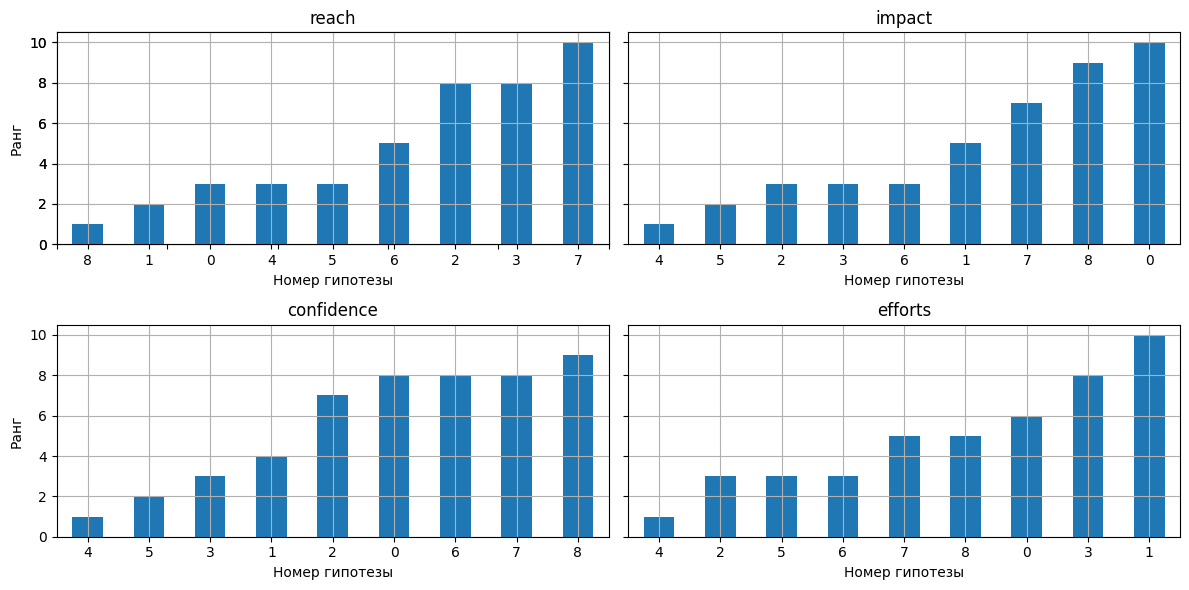

In [50]:
ax1=plt.subplot(2, 2, 1)
frame1 = plt.gca()

listt = ['reach', 'impact', 'confidence', 'efforts']
n = 1
for i in listt:
    hyp_data[i].sort_values().plot.bar(ax=plt.subplot(2, 2, n, sharey=ax1), figsize=(12, 6), rot=0)
    plt.grid(True)
    plt.xlabel('Номер гипотезы')
    plt.ylabel('Ранг')
    plt.title(i)
    # скроем дефолтные подписи оси X
    frame1.axes.xaxis.set_ticklabels([]) 
    n += 1
plt.tight_layout() 

*Промежуточный вывод 3.1*

Наибольшим охватом пользователей **reach** отличились:
1. Гипотеза №7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
2. Гипотеза №3 - "Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
3. Гипотеза №2 - "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
  
 
В аутсайдерах:
* Гипотеза №0 - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
* Гипотеза №1 - "Запустить собственную службу доставки, что сократит срок доставки заказов"
* Гипотеза №8 - "Запустить акцию, дающую скидку на товар в день рождения"

По степени влияния **impact** в топе:
1. Гипотеза №0 - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
2. Гипотеза №8 - "Запустить акцию, дающую скидку на товар в день рождения"
3. Гипотеза №7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"


В аутсайдерах:
* Гипотеза №2 - "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
* Гипотеза №5 - "Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
* Гипотеза №4 - "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"

Наибольшей уверенностью **confidence** обладают:
1. Гипотеза №8 - "Запустить акцию, дающую скидку на товар в день рождения"
2. Гипотеза №7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
3. Гипотеза №6 - "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
4. Гипотеза №0 - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"

В то время, как следующие гипотезы уверенностью похвастаться не могут:
* Гипотеза №3 - "Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
* Гипотеза №5 - "Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
* Гипотеза №4 - "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"

Самым требовательными к затратам (дорогим) ресурсов **efforts**  оказались:
1. Гипотеза №1 - "Запустить собственную службу доставки, что сократит срок доставки заказов"
2. Гипотеза №3 - "Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
3. Гипотеза №0 - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"

А самыми доступными:
* Гипотеза №5 - "Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
* Гипотеза №2 - "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
* Гипотеза №4 - "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"

### 3.2 Исследуем данные датафрейма *"ord_data"*

In [24]:
# выведем уникальные группы
ord_data['group'].unique()

array(['B', 'A'], dtype=object)

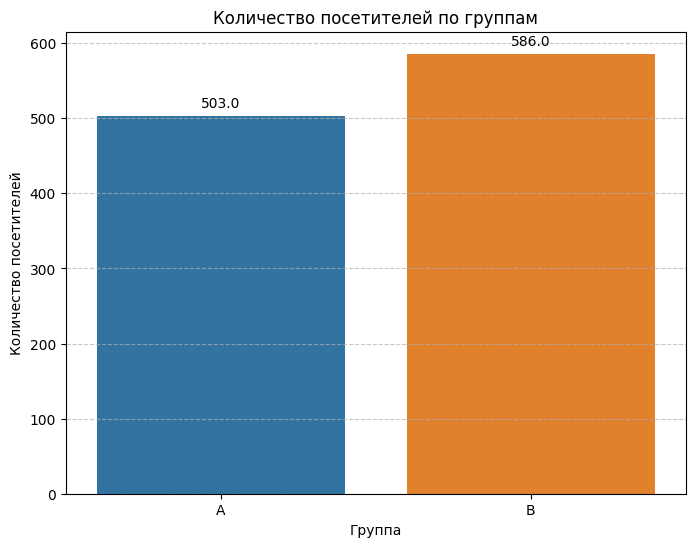

In [25]:
# построим столбчатый график с количеством посетителей по группам
ord_grouped = ord_data.groupby('group', as_index=False).agg({'user_id': 'nunique'})

plt.figure(figsize=(8, 6))
splot=sns.barplot(data=ord_grouped, x="group", y="user_id", hue='group')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Количество посетителей по группам')
plt.ylabel('Количество посетителей')
plt.xlabel('Группа')

plt.show()

In [26]:
# создадим датафрейм с количестом уникальных пользователей сгруппированный по группе и дате
ord_users = ord_data.groupby(['group','date'], as_index=False).agg({'user_id': 'nunique'})

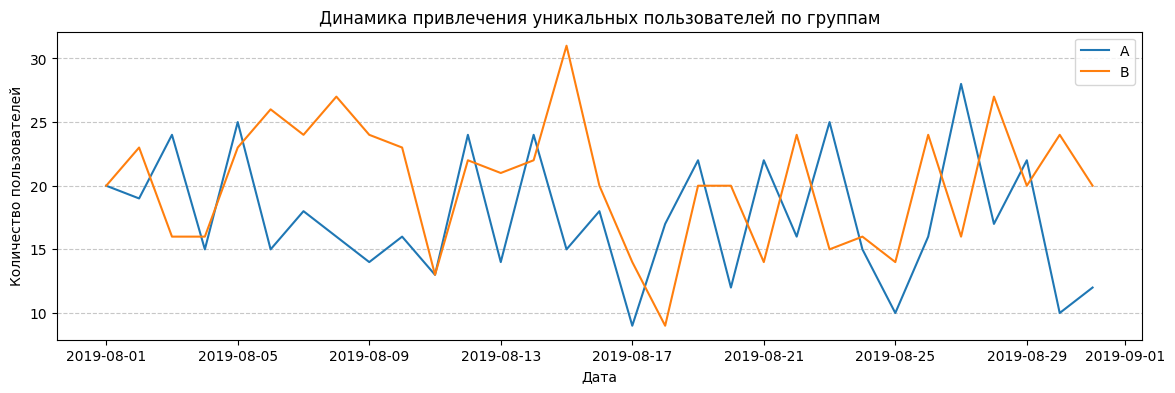

In [27]:
# построим график динамики привлечения уникальных пользователей в течение времени по группам
plt.figure(figsize=(14, 4))

ord_a = ord_users[ord_users['group']=='A']
ord_b = ord_users[ord_users['group']=='B']

plt.plot(ord_a['date'], ord_a['user_id'], label='A')
plt.plot(ord_b['date'], ord_b['user_id'], label='B')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Динамика привлечения уникальных пользователей по группам')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.legend()

plt.show()

### 3.3 Исследуем данные датафрейма *"vis_data"*

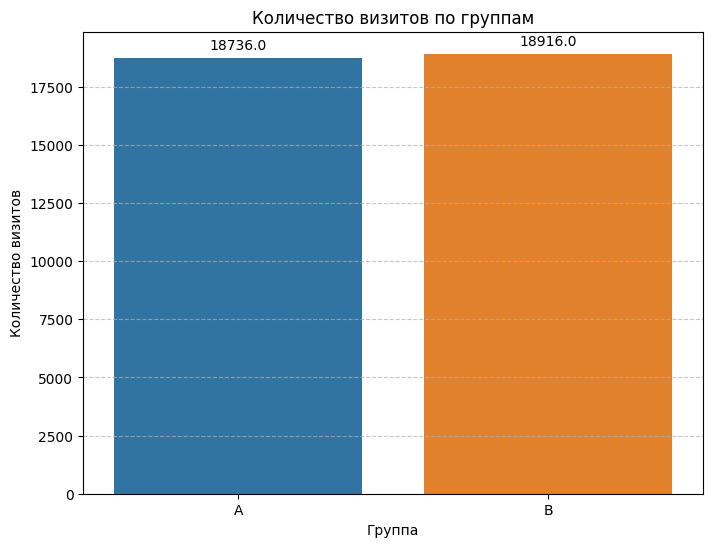

In [28]:
# построим столбчатый график с количеством визитов по группам
vis_grouped = vis_data.groupby('group', as_index=False).agg({'visitors': 'sum'})

plt.figure(figsize=(8, 6))
splot=sns.barplot(data=vis_grouped, x="group", y="visitors", hue='group')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Количество визитов по группам')
plt.ylabel('Количество визитов')
plt.xlabel('Группа')

plt.show()

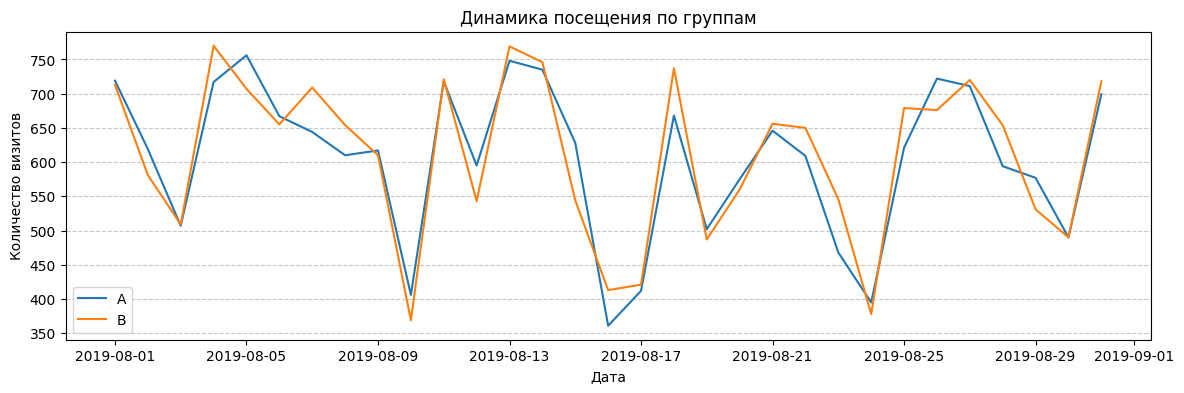

In [29]:
# построим график динамики посещения в течение времени по группам
plt.figure(figsize=(14, 4))

vis_a = vis_data[vis_data['group']=='A']
vis_b = vis_data[vis_data['group']=='B']

plt.plot(vis_a['date'], vis_a['visitors'], label='A')
plt.plot(vis_b['date'], vis_b['visitors'], label='B')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Динамика посещения по группам')
plt.xlabel('Дата')
plt.ylabel('Количество визитов')
plt.legend()

plt.show()

**ВЫВОД 3**

В данном пункте был проведен исследовательский анализ данных.

1. *Исследование датафрейма "hyp_data".* Были выявлены ТОПы и аутсайдеры среди гипотез по рангам "Reach", "Impact", "Confidence" и "Efforts". Абсолютного "победителя" выявить не удалось, хотя гипотеза под номером 7 все таки выделяется среди других высокими рангами по первым трем показателям и средним показателем "Efforts".
2. *Исследование датафрейма "ord_data".* Группа "B" лидирует по количеству уникальных пользователей - 586 против 503 у группы "A". Динамика привлечения уникальных пользователей подтвердила лидерство группы "B". Динамика обеих групп имеет спады и взлеты, однако, группа "B" сумела закрепиться выше отметки в 20 пользователей, в отличие от группы "A", трижды падающей до отметки в 10 пользователей. 
3. *Исследование датафрейма "vis_data".* По сумме визитов у групп практически паритет (18736 у группы "A" и 18916 у группы "B"). Динамика посещений показала явную корреляцию и резонанс между двумя группами. Моменты и амплитуды взлетов и падений практически идентичны.

Несмотря на разную динамику привлечения уникальных пользователей и их общего количества, сумма визитов достаточно велика. Приступим к проверке гипотез.

<a class='anchor' id='4-bullet'></a>
## 4. Приоритизация гипотез

### 4.1 Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [30]:
# добавим столбец ICE 
hyp_data['ICE'] = np.round((hyp_data['impact'] * hyp_data['confidence']) / hyp_data['efforts'], 2)
# выведем гипотезы, отсортированные по убыванию приоритета ICE
hyp_data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Промежуточный вывод 4.1**

Метод приоритизации *ICE* учитывает:
* *"impact"* - влияние на пользователей
* *"confidence"* - уверенность в гипотезе
* *"efforts"* - затраты ресурсов на проверку гипотезы.

В ходе приоритизации методом *ICE* были выявлены 3 лидирующие гипотезы:
1. **Гипотеза №8 (ICE = 16.20)** - "Запустить акцию, дающую скидку на товар в день рождения".
2. **Гипотеза №0 (ICE = 13.33)** - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".
3. **Гипотеза №7 (ICE = 11.20)** - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

### 4.2 Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [31]:
# добавим столбец RICE 
hyp_data['RICE'] = (hyp_data['reach'] * hyp_data['impact'] * hyp_data['confidence']) / hyp_data['efforts']
# выведем гипотезы, отсортированные по убыванию приоритета RICE
hyp_data.loc[:, ['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Промежуточный вывод 4.2**

Метод приоритизации *RICE* учитывает 3 показателя из метода "ICE" и плюс один дополнительный - "reach". Список представлен ниже:
* *"impact"* - влияние на пользователей
* *"confidence"* - уверенность в гипотезе
* *"efforts"* - затраты ресурсов на проверку гипотезы
* *"reach"* - охват пользователей.

В ходе приоритизации методом *ICE* были выявлены 3 лидирующие гипотезы:
1. **Гипотеза №7 (RICE = 112.0)** - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".
2. **Гипотеза №2 (RICE = 56.0)** - "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа".
3. **Гипотеза №0 (RICE = 40.0)** - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".

**ВЫВОД 4**

При применении метода приоритизации RICE лидеры среди гипотез сменились. 

Вместо *Гипотезы 8*, располагавшейся на первом месте, появилась *Гипотеза 2*. При этом *Гипотеза 7* вышла на первое место. 
Метод приоритизации RICE отличается от ICE дополнительной переменной "reach", отражающей охват пользователей. Отсюда можно сделать вывод, что *Гипотеза 8*, гласящая "Запустить акцию, дающую скидку на товар в день рождения", достаточно хороша, однако, она охватывает недостаточное количество пользователей, на которых повлияет запуск данной акции.

По итогу сравнения двух методов приоритизации можно сделать вывод, что наиболее перспективными являются две гипотезы, располагающиеся в ТОП-3 обоих методов приоритизации. А именно:

* **Гипотеза №7** - *"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"*.
* **Гипотеза №0** - *"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"*.

Также, стоит отметить и **Гипотезу №2** - *"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"*, так как по приоритету ICE она находится в первой половине списка, а по приоритету RICE на втором месте.

<a class='anchor' id='5-bullet'></a>
## 5. Анализ A/B-теста

### 5.1 Построим график кумулятивной выручки по группам.

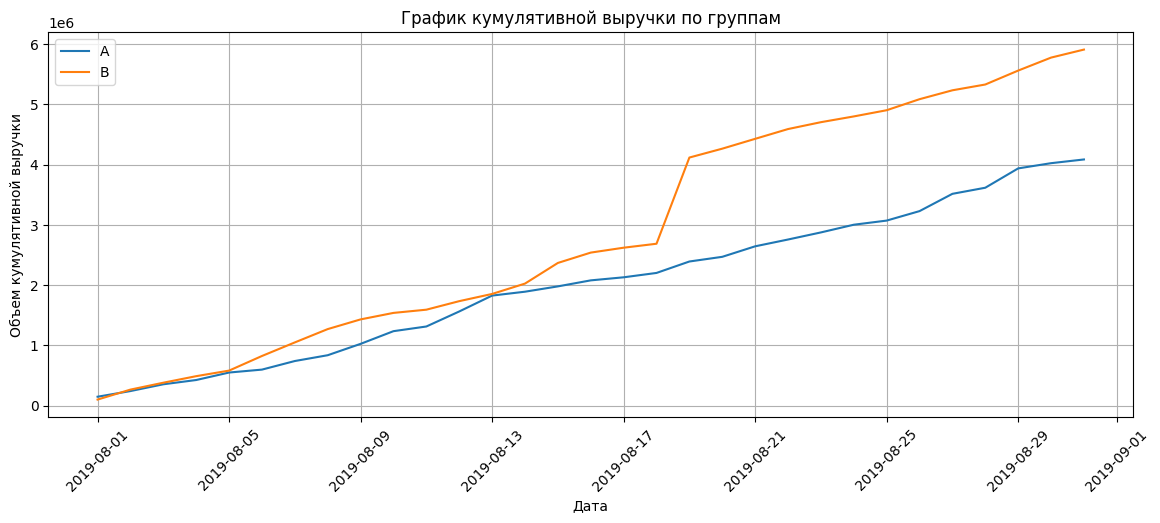

In [34]:
datesGroups = ord_data[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: ord_data[
        np.logical_and(
            ord_data['date'] <= x['date'], ord_data['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'order_id': 'nunique',
            'user_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: vis_data[
        np.logical_and(
            vis_data['date'] <= x['date'], vis_data['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(14, 5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.grid(True)
plt.title("График кумулятивной выручки по группам")
plt.xlabel("Дата")
plt.xticks(rotation=45)
plt.ylabel("Объем кумулятивной выручки")
plt.legend()

plt.show()

**Вывод 5.1**

График кумулятивной выручки по группам поначалу показывать незначительное преимущество группы "B", которое стало абсолютно явным после скачка 17.08.2019. Скачок мог случится по следующим причинам:
* Увеличение количества покупок;
* Покупки с большим чеком.

### 5.2 Построим график кумулятивного среднего чека по группам.

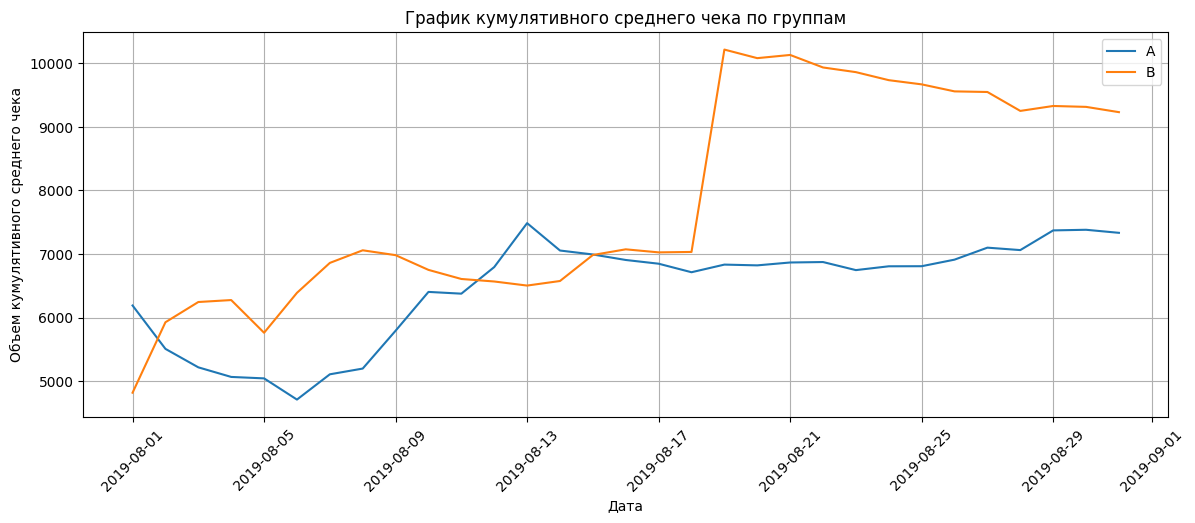

In [35]:
plt.figure(figsize=(14, 5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.grid(True)
plt.title("График кумулятивного среднего чека по группам")
plt.xlabel("Дата")
plt.xticks(rotation=45)
plt.ylabel("Объем кумулятивного среднего чека")
plt.legend()

plt.show()

**Вывод 5.2**

По графику кумулятивного среднего чека по группам видно, что в группе "B" за относительно ровным графиком следует резкий скачок среднего чека 17.08.2019. Видимо, в этот день были совершены крупные покупки.

### 5.3 Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

In [36]:
warnings.filterwarnings("ignore")

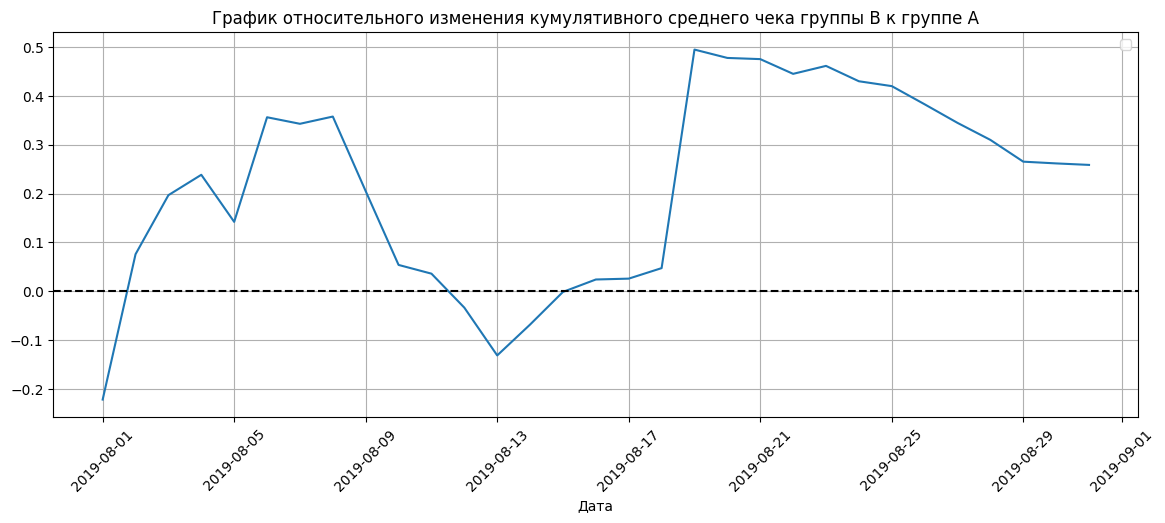

In [37]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(14, 5))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.grid(True)
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A")
plt.xlabel("Дата")
plt.xticks(rotation=45)
plt.legend()

plt.show()

**Вывод 5.3**

График относительного изменения кумулятивного среднего чека показал преимущество группы "B" над группой "A". Несмотря не временное отставание в двух промежутках, группа "B" стабильно превосходит группу "A". И резкий скачок 17.08.2019 также прослеживается на графике. Однако, данный взлет все же может быть следствием аномально больших покупок в данный период.

### 5.4 Построим график кумулятивного среднего количества заказов на посетителя по группам.

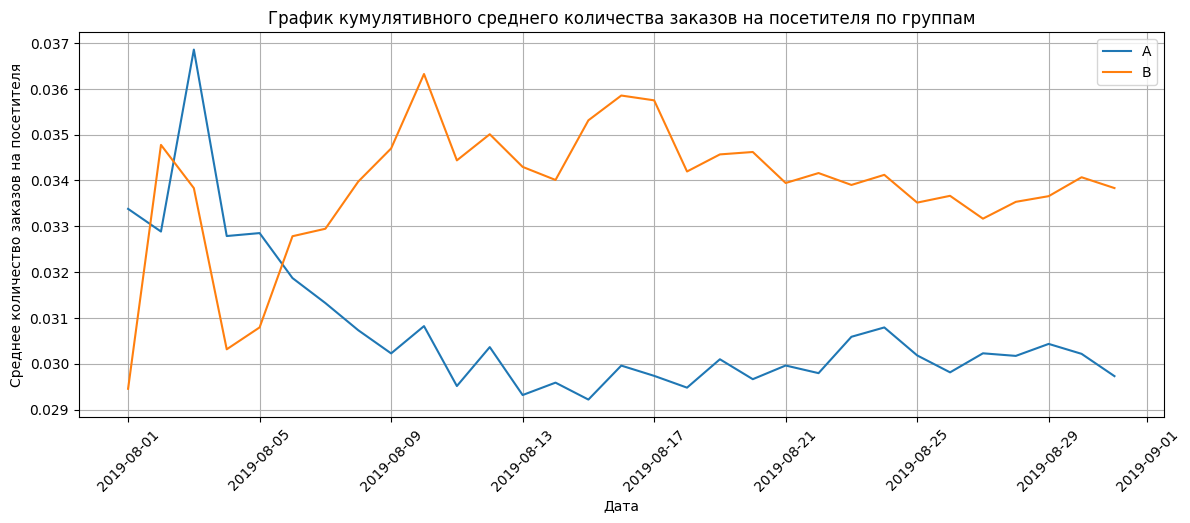

In [38]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']

cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

plt.figure(figsize=(14, 5))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.grid(True)
plt.title("График кумулятивного среднего количества заказов на посетителя по группам")
plt.xlabel("Дата")
plt.xticks(rotation=45)
plt.ylabel("Среднее количество заказов на посетителя")
plt.legend()

plt.show()

**Вывод 5.4**

График кумулятивного среднего количества заказов на посетителя по группам показал, что в начале наблюдений значения сильно колебались, а группа "A" даже превосходила группу "B". Однако, затем график группы "B" пошел вверх с одновременно с падением графика группы "B" и уже с 05.08.2019 группа "B" оказалась лидером. Данное лидерство она сохранила за собой вплоть до конца наблюдений, а средние значения зафиксировались на следующих уровнях: 

* Группа "B" - в среднем 0.034.
* Группа "A" - в среднем 0.030.

Группа "B" однозначно лидирует по среднему количеству заказов на пользователя.

### 5.5 Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

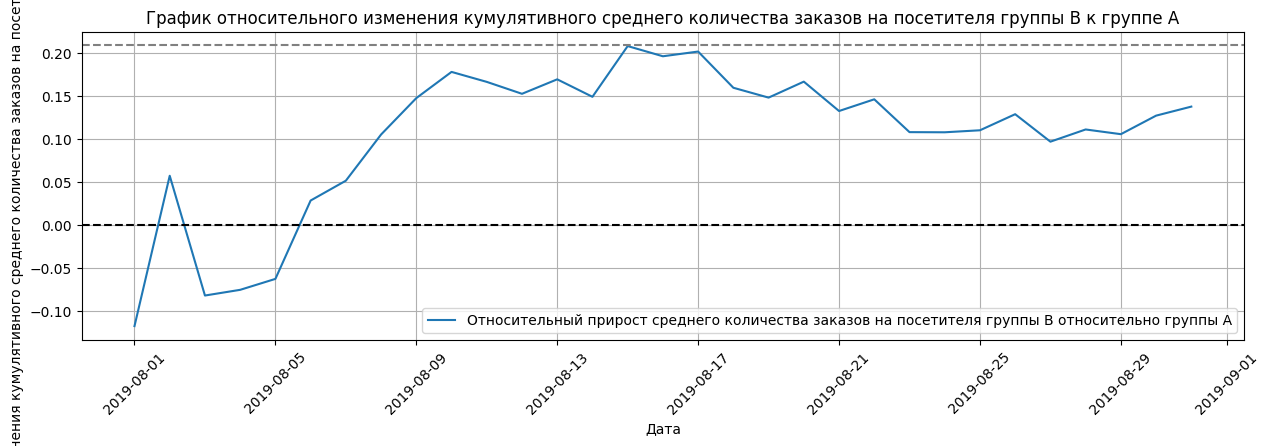

In [39]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15, 4))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,  label="Относительный прирост среднего количества заказов на посетителя группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.21, color='grey', linestyle='--')
plt.grid(True)
plt.title("График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A")
plt.xlabel("Дата")
plt.xticks(rotation=45)
plt.ylabel("Отношение изменения кумулятивного среднего количества заказов на посетителя группы B к группе A")
plt.legend()

plt.show()

**Вывод 5.5**

В начале наблюдений группа "B" отставала от группа "A" на 5-10 % по количеству средних заказов на посетителя. Однако, примерно с 06.08.2019 группа "B" уверенно вырвалась в лидеры, достигла преимущества в 20% и закрепилась в промежутке 10-15% к концу периода наблюдений.

### 5.6 Построим точечный график количества заказов по пользователям.

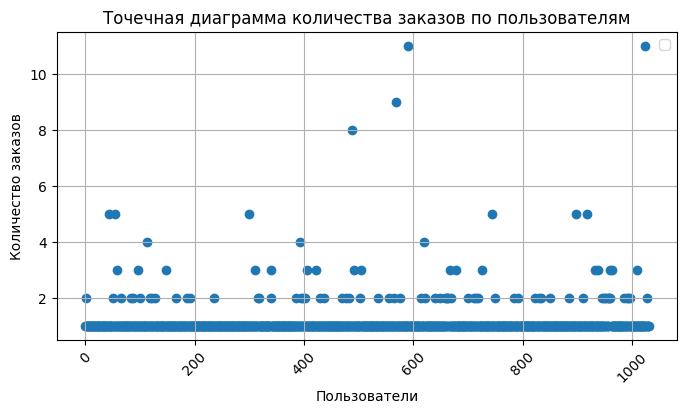

In [40]:
ordersByUsers = (
    ord_data.groupby('user_id', as_index=False)
    .agg({'order_id': 'nunique'})
)
ordersByUsers.columns = ['user_id', 'orders']

x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize=(8, 4))

plt.scatter(x_values, ordersByUsers['orders'])
plt.grid(True)
plt.title("Точечная диаграмма количества заказов по пользователям")
plt.xlabel("Пользователи")
plt.xticks(rotation=45)
plt.ylabel("Количество заказов")
plt.legend()

**Вывод 5.6**

Мы видим, что нормальное значение количества заказов на пользователя колеблется между 1 и 3. Заказов от 4 до 5 значительно меньше. А все, что находится выше однозначно можно отнести к аномалиям.

### 5.7 Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберим границу для определения аномальных пользователей.

In [55]:
perc_1 = np.percentile(ordersByUsers['orders'], [95, 99])

print(f'''95-й перцентиль количества заказов равен {round(perc_1[0])} заказам
99-й перцентиль количества заказов равен {round(perc_1[1])} заказам''')

95-й перцентиль количества заказов равен 2
99-й перцентиль количества заказов равен 4


**Вывод 5.7**

Делаем вывод, что 99% пользователей совершают не более 4 заказов. При этом 95% пользователей совершают не более 2 заказов.

*Примем порог нормальных значений количества заказов на пользователя, равным 4 заказам (по 99-му перцентилю). Пользователей, совершивших более 4 заказов, коих всего 1%, признаем аномальными.*

### 5.8 Построим точечный график стоимостей заказов.

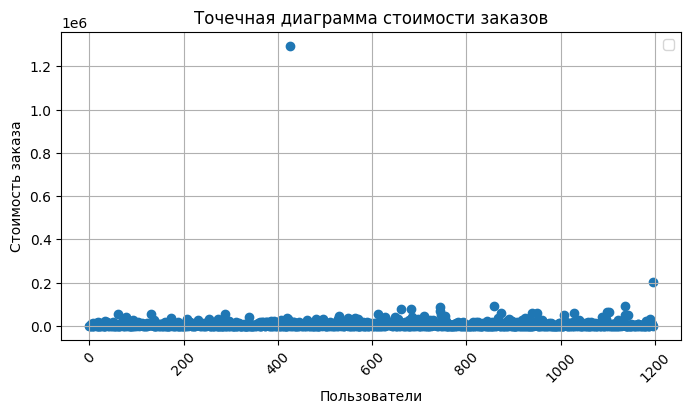

In [42]:
x_values = pd.Series(range(0, len(ord_data['revenue'])))

plt.figure(figsize=(8, 4))

plt.scatter(x_values, ord_data['revenue'])

plt.grid(True)
plt.title("Точечная диаграмма стоимости заказов")
plt.xlabel("Пользователи")
plt.xticks(rotation=45)
plt.ylabel("Стоимость заказа")
plt.legend()

**Вывод 5.8** 

В большинстве своем стоимость заказа не превышает 20 000. Есть всего 2 выброса. Один на отметке в 20 000, другой более 120 000.

### 5.9 Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [57]:
perc_2 = np.percentile(ord_data['revenue'], [95, 99])
print(f'''95-й перцентиль стоимости заказов равен {round(perc_2[0])} денег
99-й перцентиль стоимости заказов равен {round(perc_2[1])} денег''')

95-й перцентиль стоимости заказов равен 28000 денег
99-й перцентиль стоимости заказов равен 58233 денег


**Вывод 5.9**

95% заказов имеют стоимость менее 28000. При этом отметка в 99% находится на уровне 58233.

*За границу нормальных и аномальных значений примем отметку в 43 000, так как она находится посередине между 95-ым и 99-ым перцентилями. Отсечение аномалий приведет к "потере" от 1% до 5% данных.*

### 5.10 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Сформулируем гипотезу:

**H0** - Среднее количество заказов на посетителя между группами "A" и "B" равно.
<br>**H1** - Среднее количество заказов на посетителя группы "B" и "A" различны.

Также проверим относительный прирост среднего количества заказов группы "B" в сравнении с группой "A".

In [58]:
# примем уровень статистической значимости
alpha = 0.05

visitorsADaily = vis_data[vis_data['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = vis_data[vis_data['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    ord_data[ord_data['group'] == 'A'][['date', 'order_id', 'user_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    ord_data[ord_data['group'] == 'B'][['date', 'order_id', 'user_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = ord_data[ord_data['group'] == 'A'].groupby('user_id', as_index=False).agg({'order_id': pd.Series.nunique})
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = ord_data[ord_data['group'] == 'B'].groupby('user_id', as_index=False).agg({'order_id': pd.Series.nunique})
ordersByUsersB.columns = ['order_id', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

# зададим значение p-value по сырым данным для среднего количества заказов
p_value_col_1 = stats.mannwhitneyu(sampleA, sampleB)[1]
# зададим относительную разницу по сырым данным для среднего количества заказов
dif_col_1 = sampleB.mean() / sampleA.mean() - 1

if p_value_col_1 < alpha:
    print('''Отвергаем нулевую гипотезу по сырым данным. Среднее значение количества заказов для групп различны.
Значение P-Value не превышает уровень статистической значимости alpha = 0.05 и равняется {0:.3f}.

Относительный прирост среднего количества заказов для группы "B" равняется {1:.1%}'''.format(p_value_col_1, dif_col_1))

else:
    print('''Нулевая гипотеза по сырым данным подтверждена. Среднее значение количества заказов для групп одинаковы.
Значение P-Value превышает уровень статистической значимости alpha = 0.05 и равняется {0:.3f}.

Относительный прирост среднего количества заказов для группы "B" равняется {1:.1%}'''.format(p_value_col_1, dif_col_1))


Отвергаем нулевую гипотезу по сырым данным. Среднее значение количества заказов для групп различны.
Значение P-Value не превышает уровень статистической значимости alpha = 0.05 и равняется 0.017.

Относительный прирост среднего количества заказов для группы "B" равняется 13.8%


**Вывод 5.10**

Значение P-Value находится на отметке в 0.01679, что значительно меньше уровня статистической значимости, равной 0.05. Иными словами - между группами существуют статистически значимые различия. Это значит, что мы отвергаем нулевую гипотезу в пользу альтернативной, что говорит о следующем - в группах "A" и "B" среднее количествое заказов на пользователя различно.

Относительное превосходство среднего количества заказов группы "B" над группой "A" составляет 13.8%.

### 5.11 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [45]:
# зададим p-value по сырым данным для среднего чека
p_value_check_1 = stats.mannwhitneyu(ord_data[ord_data['group']=='A']['revenue'], ord_data[ord_data['group']=='B']['revenue'])[1]
# зададим относительную разницу по сырым данным для среднего чека
dif_check_1 = ord_data[ord_data['group']=='B']['revenue'].mean() / ord_data[ord_data['group']=='A']['revenue'].mean() - 1

if p_value_check_1 < alpha:
    print('''Отвергаем нулевую гипотезу по сырым данным. Средний чек для пользователей двух групп различны.
Значение P-Value не превышает уровень статистической значимости alpha = 0.05  и равняется {0:.3f}.

Относительный прирост среднего чека для группы "B" равняется {1:.1%}'''.format(p_value_check_1, dif_check_1))

else:
    print('''Нулевая гипотеза по сырым данным подтверждена. Средний чек пользователей для групп идентичен.
Значение P-Value превышает уровень статистической значимости alpha = 0.05 и равняется {0:.3f}.

Относительный прирост среднего чека для группы "B" равняется {1:.1%}'''.format(p_value_check_1, dif_check_1))

Нулевая гипотеза по сырым данным подтверждена. Средний чек пользователей для групп идентичен.
Значение P-Value превышает уровень статистической значимости alpha = 0.05 и равняется 0.729.

Относительный прирост среднего чека для группы "B" равняется 25.9%


**Вывод 5.11**

Значение P-Value = 0.729. Данное значение явно превосходит уровень статистической значимости, равный 0.05. Причин отвергать нулевую гипотезу вроде и нет, однако, относительный прирост среднего чека группы "B" составялет целых 25.9%.

### 5.12 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Примем за аномальные значения - количество заказов, превышающее значение 4 (отбросим 1% пользователей), а стоимость заказа в 43 000 (отбросим 1-5% пользователей)

In [62]:
ordersByUsersB.columns = ['user_id', 'orders']

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['user_id'], ordersByUsersB[ordersByUsersB['orders'] > 4]['user_id']], axis=0)

usersWithExpensiveOrders = ord_data[ord_data['revenue'] > 43000]['user_id']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()
print(f'Отбросим данные о {abnormalUsers.nunique()} людях')

Отбросим данные о 26 людях


In [47]:
print(f"Процент отброшенных данных составляет {(abnormalUsers.nunique() / ord_data['user_id'].nunique()):.1%}")

Процент отброшенных данных составляет 2.5%


Пользователями с аномальными значениями признаны 26 человек. Данное значение не превышает 2.5%.

In [48]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


# зададим значение p-value по очищенным данным для среднего количества заказов
p_value_col_2 = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
# зададим относительную разницу по очищенным данным для среднего количества заказов
dif_col_2 = sampleBFiltered.mean() / sampleAFiltered.mean() - 1

if p_value_col_2 < alpha:
    print('''Отвергаем нулевую гипотезу по очищенным данным. Среднее значение количества заказов для групп различны.
Значение P-Value не превышает уровень статистической значимости alpha = 0.05  и равняется {0:.3f}.

Относительный прирост среднего количества заказов для группы "B" равняется {1:.1%}'''.format(p_value_col_2, dif_col_2))

else:
    print('''Нулевая гипотеза по очищенным данным подтверждена. Среднее значение количества заказов для групп одинаковы.
Значение P-Value превышает уровень статистической значимости alpha = 0.05 и равняется {0:.3f}.

Относительный прирост среднего количества заказов для группы "B" равняется {1:.1%}'''.format(p_value_col_2, dif_col_2))


Отвергаем нулевую гипотезу по очищенным данным. Среднее значение количества заказов для групп различны.
Значение P-Value не превышает уровень статистической значимости alpha = 0.05  и равняется 0.009.

Относительный прирост среднего количества заказов для группы "B" равняется 16.7%


**Вывод 5.12**

P-Value по очищенным данным стало еще меньше и составило всего 0.009. Значит, нулевую гипотезу также отвергаем в пользу альтернативной. Среднее количество заказов у групп различны.

Относительное превосходство среднего количества заказов группы "B" над группой "A" выросло и составило 16.7% (вместо 13.8%)

**Среднее количество заказов на пользователя различны.**

### 5.13 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [49]:
check_A = ord_data[np.logical_and(ord_data['group'] == 'A', np.logical_not(ord_data['user_id'].isin(abnormalUsers)))]['revenue']
            
check_B = ord_data[np.logical_and(ord_data['group'] == 'B', np.logical_not(ord_data['user_id'].isin(abnormalUsers)))]['revenue']

# зададим p-value по сырым данным для среднего чека
p_value_check_2 = stats.mannwhitneyu(check_A, check_B)[1]
# зададим относительную разницу по сырым данным для среднего чека
dif_check_2 = check_B.mean() / check_A.mean() - 1

if p_value_check_2 < alpha:
    print('''Отвергаем нулевую гипотезу по очищенным данным. Средний чек для пользователей двух групп различны.
Значение P-Value не превышает уровень статистической значимости alpha = 0.05  и равняется {0:.3f}.

Относительный прирост среднего чека для группы "B" равняется {1:.1%}'''.format(p_value_check_2, dif_check_2))

else:
    print('''Нулевая гипотеза по очищенным данным подтверждена. Средний чек пользователей для групп идентичен.
Значение P-Value превышает уровень статистической значимости alpha = 0.05 и равняется {0:.3f}.

Относительный прирост среднего чека для группы "B" равняется {1:.1%}'''.format(p_value_check_2, dif_check_2))

Нулевая гипотеза по очищенным данным подтверждена. Средний чек пользователей для групп идентичен.
Значение P-Value превышает уровень статистической значимости alpha = 0.05 и равняется 0.587.

Относительный прирост среднего чека для группы "B" равняется 7.5%


**Вывод 5.13**

Значение P-Value при проверке статистической значимости уменьшилось после очистки данных, однако статистически значимых различий между группами по среднему чеку так и нет. 

А вот относительное превосходство среднего чека группы "B" над группой "A" снизилось до 7.5% (с прежних 25.9%).

**Средние чеки групп идентичны.**

### 5.14 Вывод по тесту

Проведение теста по "сырым" и "очищенным" данным показал, что среднее количество заказов группы "B" превышает среднее количество заказов группы "A" в рассчете на одного пользователя. При этом среднее значение чеков в группах равно.

**Это означает, что тест можно завершать, а победителем становится группа "B".**

<a class='anchor' id='6-bullet'></a>
# Общий вывод

<div style="border:solid Blue 2px; padding: 20px">

Целью данного проекта была **приоритизация гипотез, проведение A/B-теста и анализ результатов.**
Для достижения поставленных целей были проведены следующие работы:

1. **Загрузка данных.**
2. **Подготовка данных.** <br>А именно:
    * Изменение типов данных;
    * Переименование столбцов;
    * Проверка на наличие пропусков и дубликатов.
3. **Проведен исследовательский анализ данных.** <br>А именно:
    * Построены столбчатые диаграммы количества уникальных пользователей и посещений по группам;
    * Построены графики динамики изменения колчичества уникальных пользователей и посещений по группам.
4. **Проведена приоритизация гипотез** следующими методами:
    * Приоритизация ICE, учитывающая влияние на пользователей ("Impact"), уверенность в гипотезе ("Confidence") и затраты ресурсов на проверку гипотезы ("Efforts").
    * Приоритизация RICE, дополнительно учитывающая охват пользователей, к которым данная гипотеза применима ("Reach").

    Лидеры среды гипотез несколько отличались по двум методам приоритизации, однак две следуюзие гипотезы оказались в ТОП-3 по обоим методам:
    * **Гипотеза №7** - *"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"*.
    * **Гипотеза №0** - *"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"*
    Данные гипотезы самые перспективные по соотношению всех качеств.
5. **Анализ A/B теста.** <br>В данном разделе были проведены следующие работы:
    * Построены кумулятивные графики;
    * Построены графики относительного изменения кумулятивного среднего чека;
    * Построены графики относительного изменения кумулятивного среднего количества заказов;
    * Построены точечные график;
    * Рассчитаны перцентили;
    * Посчитана статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Резльтат - нулевая гипотеза отвергнута в пользу альтернативной (P-Value = 0.017). Группы различаются по количеству заказов на 13.8% в пользу группы "B";
    * Посчитана статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. Результат - нулевая гипотеза подтверждена (P-Value 0.729). Средние чеки идентичны, хотя превосходство группы "B" составило 25.9%;
    * Проведена очистка данных. Отсечен 1% пользователей, совершивших более 4 заказов, и от 1% до 5% пользователей, совершивших покупки более, чем на 43000. Тем самым были отброшены 26 пользователей, или 2.5% данных.
    * Посчитана статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данны. Результат - нулевая гипотеза отвергнута. P-Value уменьшился и составил всего 0.009. Преводство группы "B" в среднем количестве заказов увеличилось до 16.7%.
    * Посчитана статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. Результат - нулевая гипотеза подтверждена. P-Value уменьшился до 0.587, но все равно значительно превышает уровень статистической значимости в 0.05. Относительное различие в среднем чеке составило всего 7.5%.
  
**Итог**

Тест можно завершать, так как явным победителем становится группа "B", ввиду большего количества заказов на одного пользователя, при равном размере среднего чека. 
</div>